# **TWITTER SENTIMENT ANALYSIS**

## Import libraries and load the data

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load dataset 
fileName = "/content/twitterNews.csv"
tweets = pd.read_csv(fileName)

In [3]:
# load first fave tweets
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Preprocess data

In [4]:
# split feature and labels
features = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

In [5]:
# feature preprocessing
processed_features = []

for sentence in range(0, len(features)):
    # remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # converting to Lowercase
    processed_feature = processed_feature.lower()

    # append all preprocessed features
    processed_features.append(processed_feature)

In [6]:
vectorizer = TfidfVectorizer (max_features = 2500, min_df = 7, max_df = 0.8, stop_words = stopwords.words('english')) # convert words to vectors
processed_features = vectorizer.fit_transform(processed_features).toarray() # convert to array

## Train the model

In [7]:
# split dataset into train and validation
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [8]:
# train the model
text_classifier = RandomForestClassifier(n_estimators=200, random_state=32)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

## Test the model

In [9]:
# predict the data
predictions = text_classifier.predict(X_test)

In [10]:
# measure the accuracy
print('Accuracy:', (accuracy_score(y_test, predictions) * 100))

Accuracy: 75.99043715846994


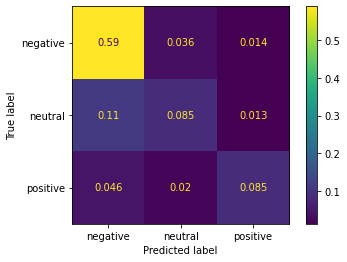

In [11]:
plot_confusion_matrix(text_classifier, X_test, y_test, normalize = 'all')
plt.show()